Hello! Time to figure out what type of Pokemon you have.
To do this we need the width and height of your pokemon.
Please look at the command pormpt at the top of the screen and follow the instructions
Sample with (width, height): (25.0, 32.0) classified as Pikachu pikachu_votes = 8
Sample with (width, height): (24.2, 31.5) classified as Pichu, Votes are even, Sum of Pikachu distance 6.48031619889 sum if Pichu distance 5.6448540298641685
Sample with (width, height): (22.0, 34.0) classified as Pikachu pikachu_votes = 7
Sample with (width, height): (20.5, 34.0) classified as Pichu pichu_votes = 8
User input ↓ 
Sample with (width, height): (27.0, 32.0) classified as Pikachu pikachu_votes = 10


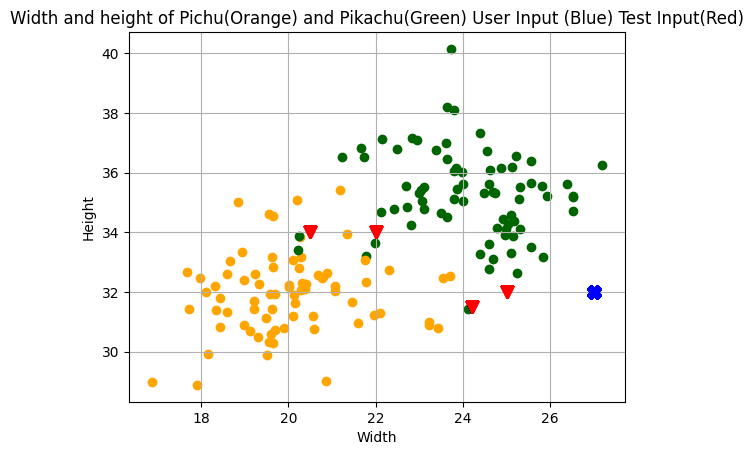

In [189]:

# Importing Packages the program needs

from math import sqrt
import random
import matplotlib.pyplot as plt


# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ Read in Data _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ #

with open("Lab_2_Data/datapoints.txt", "r") as file_data_read, open ("Lab_2_Data/testpoints.txt", "r") as file_test_read:  



# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ Clean Data _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ # ↓

# _ _ _ _ _ _ _ _ _ Training Data _ _ _ _ _ _ _ _ _ #


    data_lst = [data.strip("\n") for data in file_data_read] # Created a list with every line as a index.
    
    # pop / remove the first line in the newly formed list
    data_lst.pop(0)

    better_data_lst = [data.split(",") for data in data_lst]

    # Splitting data_lst into seperate indexes, Split at ","
    # Seperating the list into width height and label 
    
    
    width_lst = [data.split(",")[0] for data in data_lst]
    width = []
    for item in width_lst: # Converting indexes into floats into a new width list.
        width.append(float(item))
    
    height_lst = [data.split(",")[1] for data in data_lst]
    height = []
    for item in height_lst: # Converting indexes into floats into a new height list.
        height.append(float(item))
    
    label_lst = [data.split(",")[2] for data in data_lst]
    label = []
    for item in label_lst:  # Converting indexes into floats into a new label list.
        label.append(float(item))


# _ _ _ _ _ _ _ _ _ Test Data _ _ _ _ _ _ _ _ _ #

# Code help from Sam Glass
    lines = file_test_read.readlines() # Splits test file into lines
    lines = lines[1:] #skips the first line

    clean_lines = [] #Variable for clean data

    for line_number in lines: # Loops through every line
        line_number = line_number[4: -2] #Isolates and saves only the numbers in the lines

        clean_lines.append(line_number) #adds line number to clean lines list


test_w = [float(line_number.split(", ")[0]) for line_number in clean_lines] #Test list width
test_h = [float(line_number.split(", ")[1]) for line_number in clean_lines] #Test list height


# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ Random Input _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ # Bonus nr 3

temp_data_lst = [data.split(", ") for data in data_lst] # uses the data_lst we saved from the txt file and splits at comma.
full_data_lst = [] # New list for full data list converted into float
counter = 0 # counter for for loop

pikachu_lst = []
pichu_lst = []
test_counter = 0

for item in temp_data_lst: # Splits temp data into pikachu lst and pichu list

    if item[2] == "1":
        pikachu_lst.append(temp_data_lst[test_counter])
    elif item[2] == "0":
        pichu_lst.append(temp_data_lst[test_counter])

    test_counter += 1


#------------------ Splitting the data into data and training points -------------------#

# ----------------- Pikachu --------------- #
pikachu_test_lst = random.sample(pikachu_lst, k = 25) # Takes 25 random samples from pikachu list and adds to pikachu_test list

for i in pikachu_test_lst: # Removes the random samples from pikachu list
    pikachu_lst.remove(i)
    
pikachu_training_lst = list(pikachu_lst) # Creates a training list.

# ----------------- Pichu --------------- #
pichu_test_lst = random.sample(pichu_lst, k = 25) # Takes 25 random samples from pikachu list and adds to pikachu_test list

for i in pichu_test_lst: # Removes the random samples from pikachu list
    pichu_lst.remove(i)
    
pichu_training_lst = list(pichu_lst) # Creates a training list.

#------------- Combining the data ------------#

# ------ Training Data ------ #
training_data = []

def func_training_data(lst): # Creating a func for adding pokemon into the training list
    i = 0
    for item in lst:
        training_data.append(float(item[i]))
        if i == 2:
            i = 0
        else: 
            i += 1

# Adding Pichus to Training data and converting into floats

func_training_data(pichu_training_lst)


# Adding Pickachus to Training data and converting into floats

func_training_data(pikachu_training_lst)

# ----------- Test Data ------------ #
test_data = []

def func_test_data(lst): # Creating a func for adding pokemon into the training list
    i = 0
    for item in lst:
        test_data.append(float(item[i]))
        if i == 2:
            i = 0
        else: 
            i += 1
# Adding Pichus to Test data and converting into floats
func_test_data(pichu_test_lst)

# Adding Pickachus to Test data and converting into floats
func_test_data(pikachu_test_lst)

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ User Input _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ #



def func_user_input():
    # Text for user
    print(f"Hello! Time to figure out what type of Pokemon you have.\nTo do this we need the width and height of your pokemon.\nPlease look at the command pormpt at the top of the screen and follow the instructions")
    while True: # Infinite loop until broken
        user_input_width = input("Enter the width of your Pokemon: ") # Getting input from user
        if user_input_width.upper() == "HELP": # Checks to see if user typed help
            print("In order to predict your Pokemon you need to enter a valid number between 1 and 100\nNo Characters Allowed") # Help text only if user asks for it.
        else:
        
            try:
                user_input_width = float(user_input_width) # Checks if we can convert user input to float.
                if not 1 <= user_input_width <= 100: # Checks for valid number
                    raise ValueError()
                break # Breaks loop
            except ValueError as err: # if user input could not be converted into float print helpful message, if not continue to the next while loop
                print("That is not a valid input, for more information type help ")

    while True: # Same loop as above but we get the height value instead.
        user_input_height = input("Enter the height of your pokemon: ")
        if user_input_height.upper() == "HELP":
            print("In order to predict your Pokemon you need to enter a valid number between 1 and 100\nNo Characters Allowed")
        else:
        
            try:
                user_input_height = float(user_input_height)
                if not 1 <= user_input_height <= 100:
                    raise ValueError()
                break
            except ValueError as err:
                print("That is not a valid input, for more information type help ")

    # Converting valid inputs into lists so that we can zip them later.
    user_input_width = [user_input_width]
    user_input_height = [user_input_height]
    #Returns the variables as lists in a touple to be used later 
    return user_input_width, user_input_height

user_input_width, user_input_height = func_user_input() # Setting Variables

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ Calculate Distance _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ #


def func_calculated_distance(test_data_w, test_data_h):
    pika_dist = [] 
    pich_dist = []
    
    test_count = 0 # Counter for loop below

    # The point of this list is to find the nearest neighbor from the test data and the sample data.
    for test_width, test_height in zip(test_data_w, test_data_h):
        #We start by counting through our test lists for width and height
        dist_lst = [] #Creatint a list for distance between the test point and all sample points
        temp_close_lst = []
        #We also empty it between every run of the loop below
        
        for w, h, l in zip(width, height, label): # Looping through sample data
            
            # Calculating the euclidean distance between the sample point and test point
            dist = (sqrt((w - test_data_w[test_count])**2 + (h - test_data_h[test_count])**2))
            
            dist_lst.append([dist, l]) # Adding the distance between sample and test and adding the label, 1.0 or 0.0

        dist_lst = sorted(dist_lst) # At the end of the first loop we sort the list to find the shortest distance

        for i in range(10): # Gets the current 10 closest distances
            temp_close_lst.append(dist_lst[i])
        


        ten_closest = []        #Creating of the 10 closest from temp list list
        for i in range(10):
            ten_closest.append(temp_close_lst[i])


        vote_lst = [] # Creating the votelist

        for labels in range(10): # Getting labels from ten_close list
            vote_lst.append(ten_closest[labels][1]) # Putting into vote_lst 

    # ----------- Tie breaker function ----------- #
        def func_tie_break():
            for i in range(10):
               
                if temp_close_lst[i][1] == 1.0: # Getting the distance from the temp list
                    pika_dist.append(temp_close_lst[i][0]) # Adds the distance to pika / pichu lists

                else:
                    pich_dist.append(temp_close_lst[i][0])   

            if sum(pika_dist) < sum(pich_dist): # Calculates the sum of both distances in order to find the smallest number and returns it
                return print(f"Sample with (width, height): {test_data_w[test_count], test_data_h[test_count]} classified as Pikachu, Votes are even, Sum of Pikachu distance {sum(pika_dist)} sum if Pichu distance{sum(pich_dist)}") 
            
            elif sum(pika_dist) > sum(pich_dist):  # Calculates the sum of both distances in order to find the smallest number and returns it
                return print(f"Sample with (width, height): {test_data_w[test_count], test_data_h[test_count]} classified as Pichu, Votes are even, Sum of Pikachu distance {sum(pika_dist)} sum if Pichu distance {sum(pich_dist)}")


    # ------------------ Voting --------------- #
        pikachu_votes = 0 # Var for pikachu votes
        pichu_votes = 0 # var for pichu votes
        
        for vote in vote_lst: # list that goes through vote_lst
            
            if vote == 1.0: 
                pikachu_votes += 1 # Add votes to correct variable
            else:
                pichu_votes += 1

        if pikachu_votes > pichu_votes: 

            print(f"Sample with (width, height): {test_data_w[test_count], test_data_h[test_count]} classified as Pikachu {pikachu_votes = }") #Add probability procentege



        elif pikachu_votes == pichu_votes: # If the votes are the same. SUM THE CLOSEST DISTANCE IN ORDER TO FIND THE TRUE LABEL. WHEN VOTES ARE EQUAL.

            func_tie_break() # Calls the tiebreak function

        else:

            print(f"Sample with (width, height): {test_data_w[test_count], test_data_h[test_count]} classified as Pichu {pichu_votes = }") #Add probability procentege

        test_count += 1 # Adding one to the counter so that the next loop it checks the next point in the test list.


    return


func_calculated_distance(test_w, test_h) # calculates with with the test data

print("User input ↓ ")
func_calculated_distance(user_input_width, user_input_height) #Calculates with user input





# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _    Calculate Accuracy    _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ # Bonus 4



## I was not able to complete this task with a satisfactory solution on this day, I will when time allows it return to this lab and complete it for my own sake

# I believe that I started with a very inefficient way to split the data, converted it into floats too early so that it could not be manipulated as easily later.

# I was afraid to throw away the code and start again, eventhough in hindsight that would have been the better move.

# Using dictionaries and numpy would in several ways helped me if I understood them better and will spend more time with that in my free time.

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _         Plot Data        _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ #


def plot_func():
        


    #Creating a loop with if statement in order to decide what color should be chosen in the scatter plot

    p_c = "" #Creating a variable for pokemon color


    
    for (w, h, l) in zip(width, height, label): # Jonas Bengtström helped me with this code.
        if l == 1.0:
            p_c = "darkgreen"

        else:
            p_c = "orange"
        plt.scatter(w, h, c = p_c) #Plots the training data
        plt.plot(test_w, test_h, "v", c = "red", markersize = 8) #Plots the test data
        plt.plot(user_input_width, user_input_height, 'X', c = 'Blue', markersize = 10) #Plots the user input

    plt.title("Width and height of Pichu(Orange) and Pikachu(Green) User Input (Blue) Test Input(Red)")
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.grid()


plot_func()







